In [16]:
import cv2
import copy
from matplotlib import pyplot as plt
import numpy as np

CAMERA = 0
PORTS = 3
CROP_POINTS = [155, 425, 142, 362] #[y1, y2, x1, x2]

def capture_pic(camera = CAMERA, rotation = 0):
    '''Capture a picture from camera.
    
    Args:
        name (str):     The name of picture
        camera (int):   Camera number (Use check_camera() to find correct camera
        rotation(int):  Number of anti-clockwise rotations for image
    
    Returns:
        bool: True if successful, False otherwise
    '''
    try:
        cap = cv2.VideoCapture(camera)
        # Capture frame-by-frame
        ret, frame = cap.read()
    
        frame = np.rot90(frame, rotation)
    # Display the resulting frame
        #cv2.imwrite(name,frame)
        #plt.imshow(frame)
        return frame
    except:
        return False
    

def check_camera(ports = PORTS):
    
    '''Checks all attached ports for connected camera
    
    Args:
        ports (int): Number of ports to test
    
    Returns:
        Displays matplotlib figure with connected cameras and corresponding port numbers
    '''
    frame = {}
    for i in range(ports):
        vc = cv2.VideoCapture(i)
        if vc.isOpened():
            rval, capture = vc.read()
            frame[i] = capture
        else:
            print ('Webcam ' + str(i) + ' is not connected')
        vc.release()
    dim1 = int(np.ceil(np.sqrt(len(frame))))
    dim2 = int(np.ceil(float(len(frame))/dim1))
    dim = (str(dim1) + str(dim2))
    print (len(frame), dim)
    if len(frame)>0:
        plt.figure()
        num = 1
        for (key) in frame:
            #print key, np.shape(frame[key])
            plt.subplot(int(str(dim)+str(num))), plt.imshow(frame[key])
            plt.title(str(key)), plt.xticks([]), plt.yticks([])
            num = num + 1
    else:
        print ("No webcams detected at all")
        plt.show()
        
def crop_out(image, crop_points=CROP_POINTS):
    '''Crops image based on crop_points
    
    Args:
        image (numpy.array): RGB or Gray image array of any size
        crop_points (list) : list of crop points in format [y1, y2, x1, x2]
    
    Returns:
        image (numpy.array): cropped image array
    '''
    img = copy.copy(image)
    crop_points = [int(i) for i in crop_points]

    img = img[crop_points[0]:crop_points[1], crop_points[2]:crop_points[3]]
    
    return img

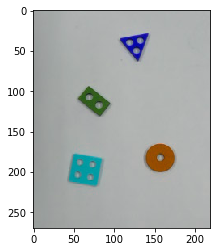

True

In [19]:
n = "3"
captured_img = capture_pic(0, 3)
cv2.imwrite("test"+n+"_raw.jpg", captured_img)
cropped = crop_out(captured_img)
plt.imshow(cropped)
plt.show()
cv2.imwrite("test"+n+".jpg", cropped)

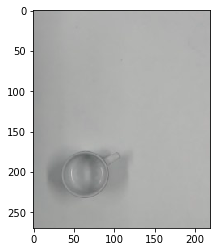

True

In [52]:
n = str('4')
captured_img = capture_pic(0, 3)
cv2.imwrite("teacup"+n+"_raw.jpg", captured_img)
cropped = crop_out(captured_img)
plt.imshow(cropped)
plt.show()
cv2.imwrite("teacup"+n+".jpg", cropped)
